# 1. Introduction

Nama : Sigit Pramana

Dataset : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

Objective : Membuat Classification dengan berbagai macam model untuk memprediksi reservasi di suatu hotel akan Cancel atau Tidak Cancel dalam pemesanan dan menenukan model yang paling cocok digunakan pada dataset agar membantu pihak hotel menenemukan gambaran pendapatan dari reservasi

# 2. Import Libraries

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# 3. Data Loading

In [2]:
# loda data

data = pd.read_csv(r"C:\Users\MyBook Z Series\Documents\Hacktiv8\P1M2\Hotel Reservations.csv")

In [3]:
# menampilkan 5 baris data awal

data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# menampilkan 5 baris data akhir

data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
# cek dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- Terdapat 5 kolom bertipe data object/kategori dan sisanya berupa data numerik semua

# 4. EDA (Exploratory Data Analysis)

## Booking Status

<function matplotlib.pyplot.show(close=None, block=None)>

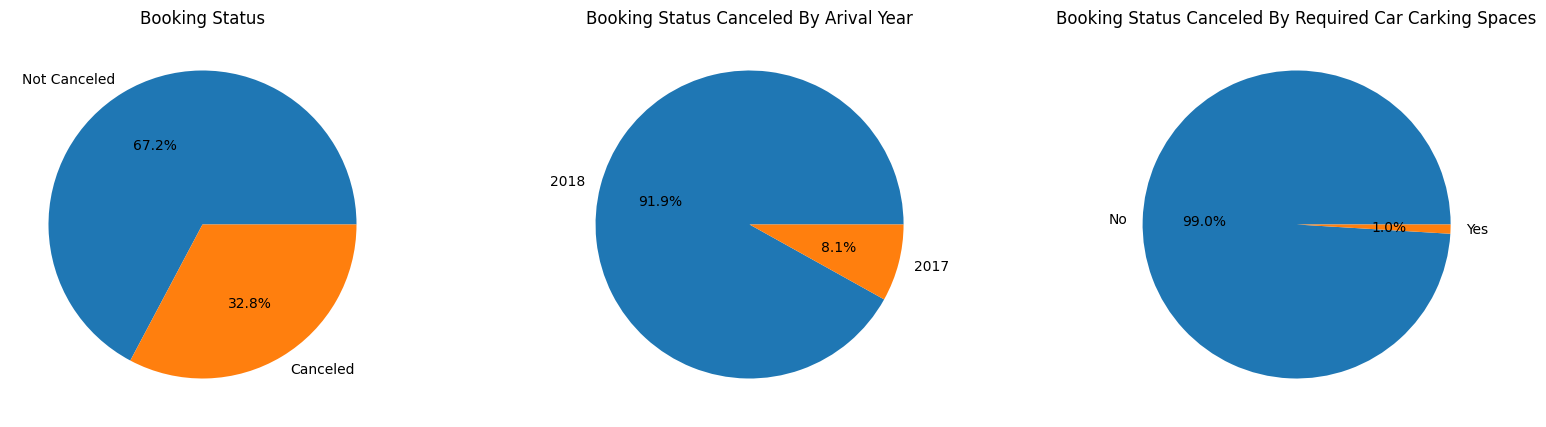

In [10]:
# memuat data pada kolom booking_status yang berstatus canceled

data_canceled= data[data['booking_status']=='Canceled']

# menampilkan pie chart untuk kolom kolom pada dataset

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.pie(data['booking_status'].value_counts(), labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%')
plt.title('Booking Status')
plt.show

plt.subplot(1, 3, 2)
plt.pie(data_canceled['arrival_year'].value_counts(),  labels=['2018', '2017'],autopct='%1.1f%%')
plt.title('Booking Status Canceled By Arival Year')
plt.show

plt.subplot(1, 3, 3)
plt.pie(data_canceled['required_car_parking_space'].value_counts(),labels=['No', 'Yes'],autopct='%1.1f%%')
plt.title('Booking Status Canceled By Required Car Carking Spaces')
plt.show

- Dari chart diatas data imbalance dimana banyak yang tidak cancel, dan yang cancel lebih sedikit. Dalam hal bisnis ini cukup baik untuk pihak hotelnya, karena hanya sedikit yang sudah reservasi dan membatalkannya, hanya 11.885 dari total keseluruhan data yaitu 36.275
- Kebnayakan pembatalan reservasi terjadi pada tahun 2018
- Hampir padad semua pembatalan reservasi, kebanyakan pelanggan tidak membutuhkan parkiran mobil

<function matplotlib.pyplot.show(close=None, block=None)>

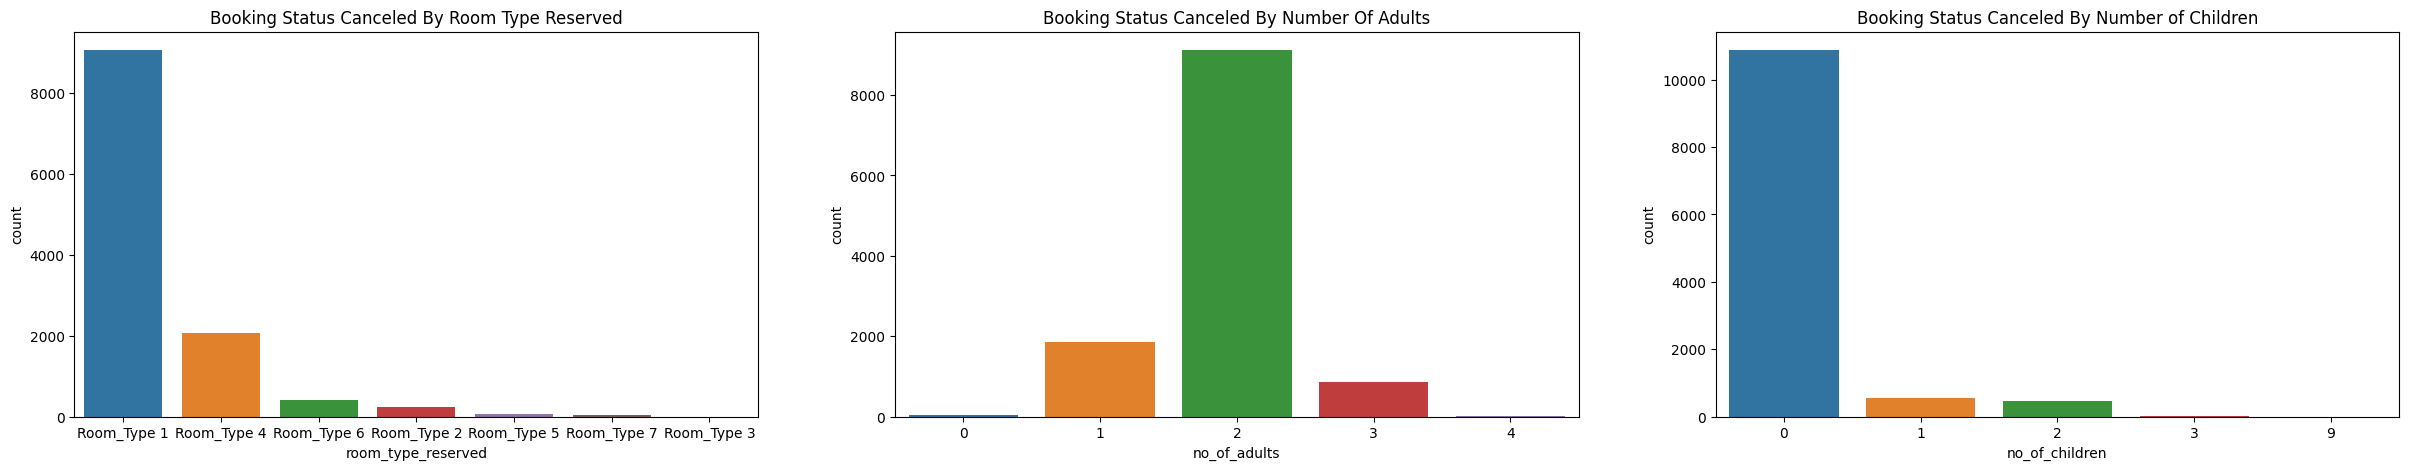

In [5]:
# memnampilkan booking status canceled berdasarkan kolom lain ke dalam chart

plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=data_canceled['room_type_reserved'])
plt.title('Booking Status Canceled By Room Type Reserved')
plt.show

plt.subplot(1, 3, 2)
sns.countplot(x=data_canceled['no_of_adults'])
plt.title('Booking Status Canceled By Number Of Adults')
plt.show

plt.subplot(1, 3, 3)
sns.countplot(x=data_canceled['no_of_children'])
plt.title('Booking Status Canceled By Number of Children')
plt.show

- Pembatalan reservasi kebanyakan terjadi pada room type 1
- Pembatalan paling banyak ada pada pemesanan yang satu kamar akan ditempati oleh 2 orang dewasa saja
- Kebanyakan pelanggan yang membatalkan reservasi tidak membawa anak, makanya grafik pada no_of_childrennya untuk 0 sangat tinggi di bandingkan yang lainnya 

<function matplotlib.pyplot.show(close=None, block=None)>

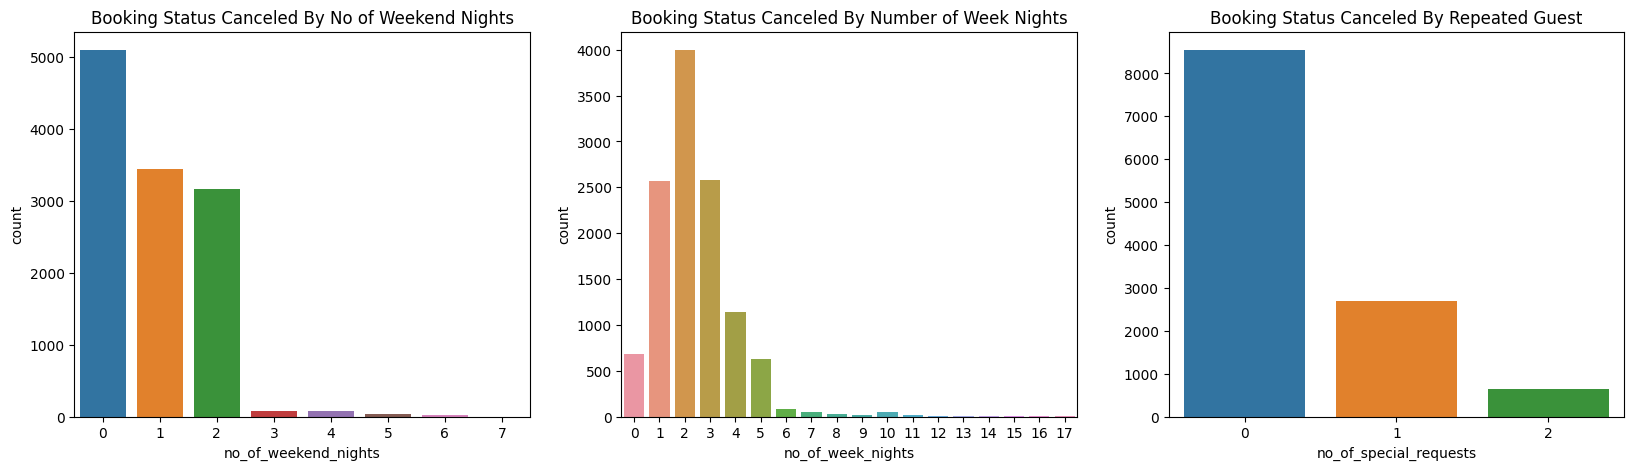

In [6]:
# memnampilkan booking status canceled berdasarkan kolom lain ke dalam chart

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=data_canceled['no_of_weekend_nights'])
plt.title('Booking Status Canceled By No of Weekend Nights')
plt.show

plt.subplot(1, 3, 2)
sns.countplot(x=data_canceled['no_of_week_nights'])
plt.title('Booking Status Canceled By Number of Week Nights')
plt.show

plt.subplot(1, 3, 3)
sns.countplot(x=data_canceled['no_of_special_requests'])
plt.title('Booking Status Canceled By Repeated Guest')
plt.show

- Dari chart number of weekend night dapat terlihat bahwa reservasi yang cancel kebanyakan tidak mengambil weekend night (sabtu atau minggu) pada saat reservasi. dapat terlihat dari pada chart weekend night 0 nya yang tinggi
- Dari chart Number of Week Nights, orang orang yang melakukan cancel kebanyakan memesaan 1-3 hari pada hari biasa, antara senin sampai jumat
- Kebanyakan reservasi yang dicancel mayoritas tidak mennyebutkan spesial request, jadi langsung pesan ssaja tanpa ada pesan khusus

<function matplotlib.pyplot.show(close=None, block=None)>

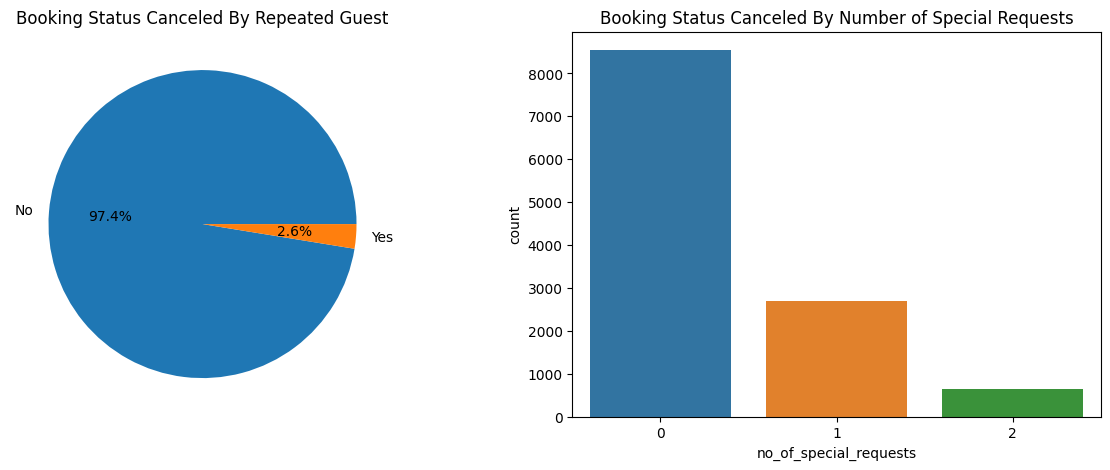

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.pie(data['repeated_guest'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Booking Status Canceled By Repeated Guest')
plt.show

plt.subplot(1, 2, 2)
sns.countplot(x=data_canceled['no_of_special_requests'])
plt.title('Booking Status Canceled By Number of Special Requests')
plt.show

In [7]:
# membuat fungsi untuk kolom avg_price_per_room dan kolom lead_time

def avg_price_per_room_group(x):
    if x <= 50.0 :
        x= 'Price below 50'
    elif x >50.0 and x <=150.0:
        x= 'Price from 50 to 150'
    elif x >150.0 and x <=300.0:
        x= 'Price from 150 to 300'
    elif x >300.0 and x <=450.0:
        x= 'Price from 300 to 450'
    else:
        x= 'Price 450+'
    return x

def lead_time_group(x):
    if x <= 30.0 :
        x= 'Under 1 Month'
    elif x >30.0  and x <= 60:
        x= 'Under 2 Month'
    elif x > 60.0 and x <=90.0:
        x= 'Under 3 Month'
    else:
        x= 'Upper 3 Month'
    return x

In [8]:
# menambhakan kolom baru hasil fungsi

data_canceled['price_per_room_group']=data_canceled['avg_price_per_room'].apply(avg_price_per_room_group)
data_canceled['lead_time_group']=data_canceled['lead_time'].apply(lead_time_group)

C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_6160\340001037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_canceled['price_per_room_group']=data_canceled['avg_price_per_room'].apply(avg_price_per_room_group)
C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_6160\340001037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_canceled['lead_time_group']=data_canceled['lead_time'].apply(lead_time_group)


<function matplotlib.pyplot.show(close=None, block=None)>

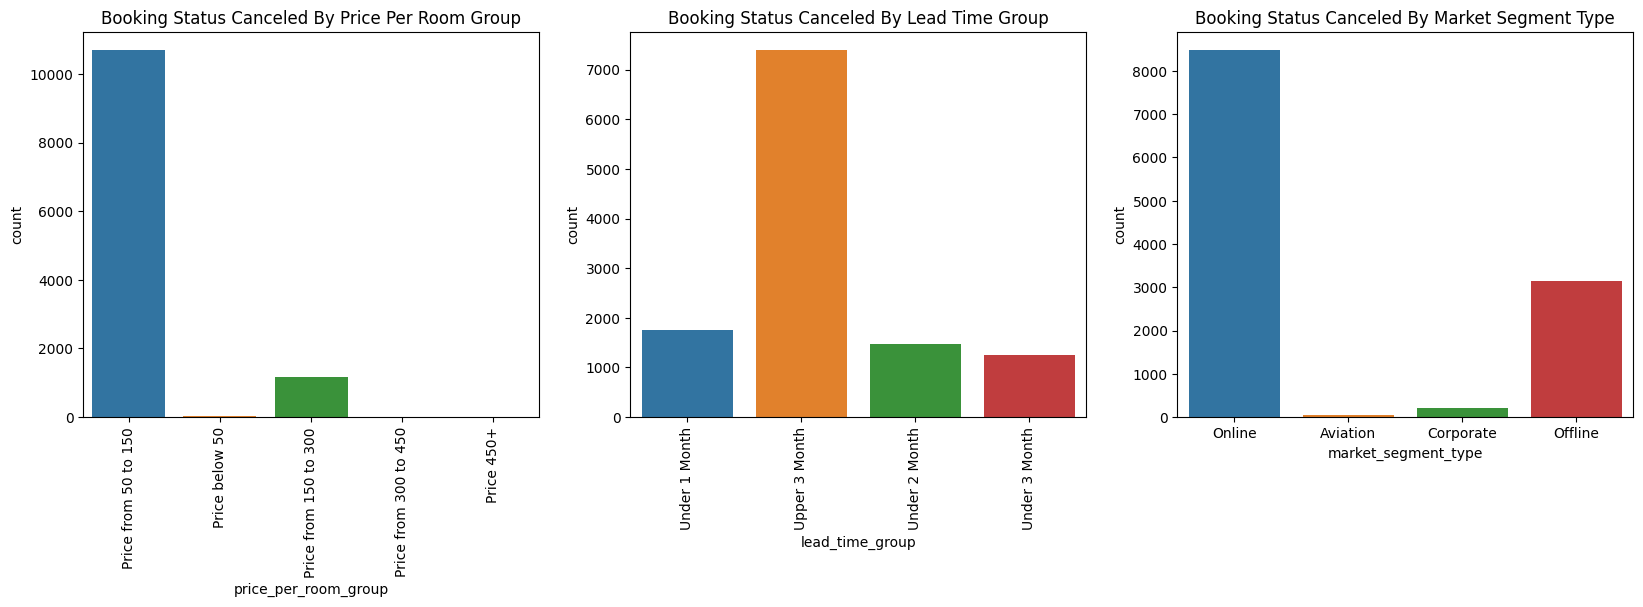

In [9]:
# memnampilkan booking status canceled berdasarkan kolom lain ke dalam chart

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=data_canceled['price_per_room_group'])
plt.title('Booking Status Canceled By Price Per Room Group')
plt.xticks(rotation=90)
plt.show

plt.subplot(1, 3, 2)
sns.countplot(x=data_canceled['lead_time_group'])
plt.title('Booking Status Canceled By Lead Time Group')
plt.xticks(rotation=90)
plt.show

plt.subplot(1, 3, 3)
sns.countplot(x=data_canceled['market_segment_type'])
plt.title('Booking Status Canceled By Market Segment Type')
plt.show


- Reservasi yang di cancel mayoritas berada pada range harga 50-150, pada range harga tersebut banyak yang membatalkan reservasinya
- Selisih waktu booking dan kedatangan pelanggan yang diatas 3 bulan sangat rawan sekali terjadi pembatalan, terlihat pada grafik Booking Status Canceled By Lead Time Group diatas
- Kebanyakan pembatalan berada pada market segment online, dimana memang ini adalah masalah baru dalam dunia bisnis hotel sejak merambah ke pasar online, dimana fee pembatalan yang rendah, dengan mudahnya mengcancele dari aplikasi

<function matplotlib.pyplot.show(close=None, block=None)>

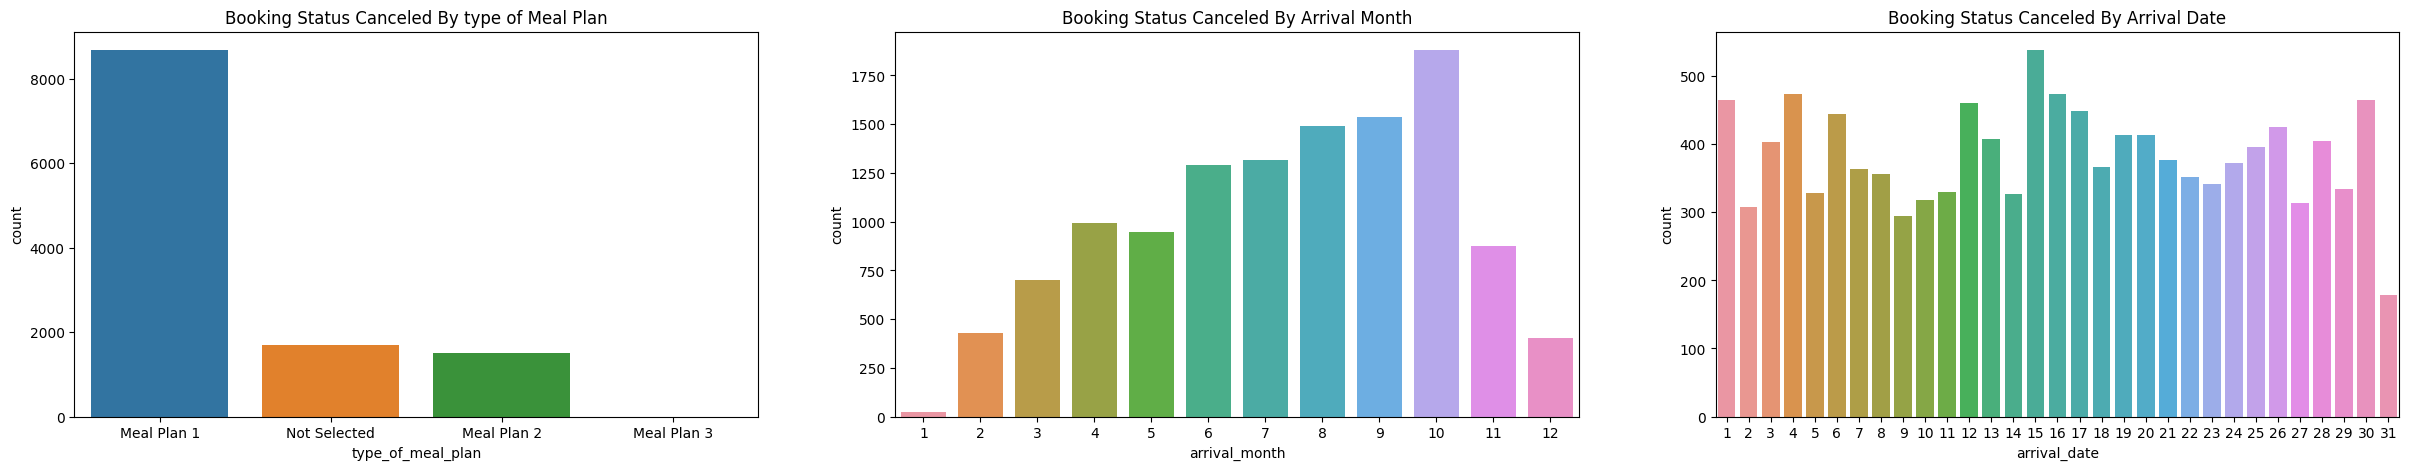

In [12]:
# memnampilkan booking status canceled berdasarkan kolom lain ke dalam chart

plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=data_canceled['type_of_meal_plan'])
plt.title('Booking Status Canceled By type of Meal Plan')
plt.show

plt.subplot(1, 3, 2)
sns.countplot(x=data_canceled['arrival_month'])
plt.title('Booking Status Canceled By Arrival Month')
plt.show

plt.subplot(1, 3, 3)
sns.countplot(x=data_canceled['arrival_date'])
plt.title('Booking Status Canceled By Arrival Date')
plt.show

- Dalam kolom meal plan, yang mengcancel reservasi kebanyakan memilih meal plan 1
- Reservasi yang dibatalkan kebanyakan pelanggan yang akan menginap pada bulan 10 atau oktober, diamana pada akhir tahun lebih sedikit pelanggan yang membatalkan reservasi
- Untuk reservasi yang cancel berdasarkan tanggal kedatangan ini hasilnya rata, tidak ada tanggal yang benar benar mencolok 

<function matplotlib.pyplot.show(close=None, block=None)>

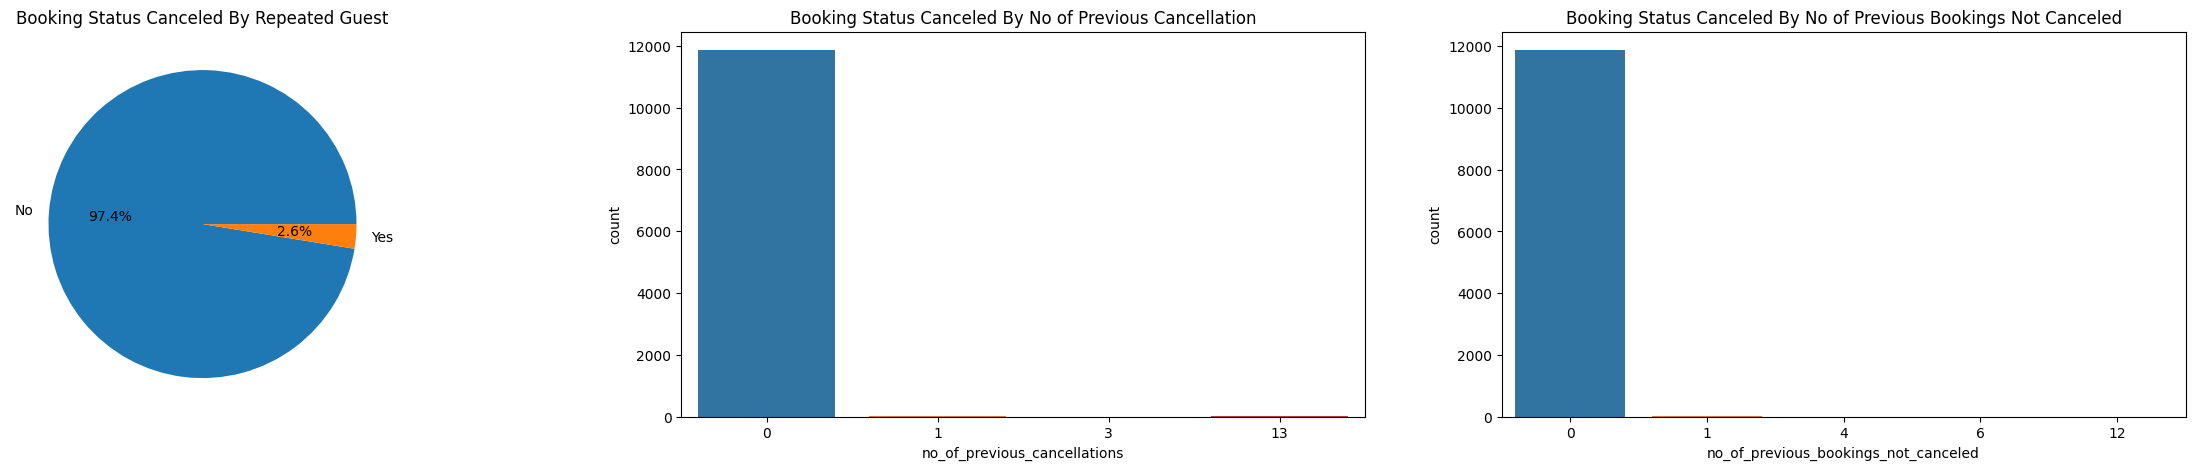

In [13]:
# memnampilkan booking status canceled berdasarkan kolom lain ke dalam chart

plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
plt.pie(data['repeated_guest'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Booking Status Canceled By Repeated Guest')
plt.show

plt.subplot(1, 3, 2)
sns.countplot(x=data_canceled['no_of_previous_cancellations'])
plt.title('Booking Status Canceled By No of Previous Cancellation')
plt.show

plt.subplot(1, 3, 3)
sns.countplot(x=data_canceled['no_of_previous_bookings_not_canceled'])
plt.title('Booking Status Canceled By No of Previous Bookings Not Canceled')
plt.show

- Ada sedikit pelanggan yang pernah menginap lalu reservasi lagi dan tiba-tiba membatalkan reservasi tersebut

## Korelasi Antar Kolom

In [16]:
# memisahkan kolom numerik dan kolom kategori

num_columnsEDA = data.select_dtypes(include=np.number)
cat_columnsEDA = data.select_dtypes(include=['object'])

In [17]:
# encoding kolom kategori dengan label encoder untuk dibuat heatmap

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data_cat_encode = cat_columnsEDA.copy()
for col in data_cat_encode.select_dtypes(include='O').columns: data_cat_encode[col]=le.fit_transform(data_cat_encode[col])

In [18]:
# menggabungkan kolom kategori yang telah di encode dengan kolom numerik

df = pd.concat([data_cat_encode, num_columnsEDA], axis=1)

<AxesSubplot: >

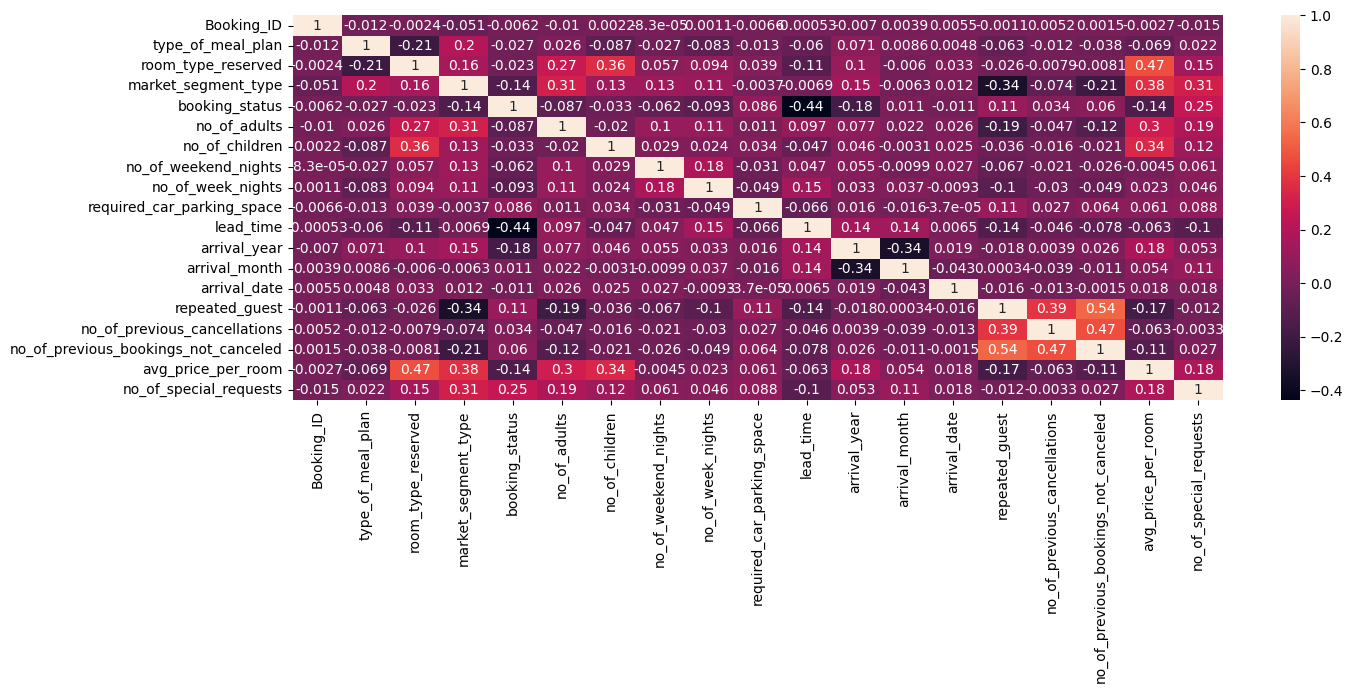

In [19]:
# melihat korelasi antara kolom dengan kolom target booking_status

plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

- Dari hetamap diatas banyak kolom yang kurang berkorelasi dengan target kolom booking status, dimana korelasinya berada di bawah 0,1. Jadi untuk di jadikan fitur ddalam menentukan classifier cancel atau tidak disni saya akan memilih kolom yang memiliki korelasi dengan target diatas 0,1 yitu kolom 'market_segment_type', 'lead_time', 'arrival_year', 'repeated_guest', 'avg_price_per_room', dan 'no_of_special_requests'

# 5. Fitur Engginering

## Seleksi Fitur

Disini saya coba menggunakan SelectKbest untuk menyeleksi fitur-fitur yang akan dipakai dalam pembuatan model machine learning, karena lebih mudah untuk mencari fitur-fitur yang akan di pakai, selain itu saya juga ingin melihat apakah ada kesaman dengan fitur-fitur yang telah saya analisa dengan heatmap

In [20]:
# memisahlkan X fitur dan y target

X1 = df.drop(['booking_status'], axis=1)
y1 = df['booking_status']

In [21]:
# memilih fitur yang akan digunakan dengan metode SelectKBest

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
selector.fit_transform(X1,y1)
mask = selector.get_support()

# melihat fitur-fitur terbaik
print(X1.columns[mask])

Index(['market_segment_type', 'lead_time', 'arrival_year', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


Hasil dari selectkbest fitur-fiturnya adalah kolom 'market_segment_type', 'lead_time', 'arrival_year', 'repeated_guest', 'avg_price_per_room', dan 'no_of_special_requests'. Hasil ini menunjukan kesamaan dengan tabel heatmap yang telah saya buat.

In [20]:
# membuat data baru yang akan digunakan sebagai fitur

data1=data[['booking_status','market_segment_type', 'lead_time', 'arrival_year', 'repeated_guest','avg_price_per_room', 'no_of_special_requests']]

## Memisahkan Train-set dan Test-set

In [21]:
# memisahkan X fitur dan y target

X = data1.drop(['booking_status'],axis=1)
y = data1['booking_status'].map(lambda x: 1 if x == 'Canceled' else 0)

In [22]:
# memisahkan train-set dan test-set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=26)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (29020, 6)
Test Size :  (7255, 6)


In [23]:
# memisahkan kolom numerik dan kolom kategori

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

## Cek Missing Value

In [24]:
# cek missing value X_train

X_train.isnull().sum()

market_segment_type       0
lead_time                 0
arrival_year              0
repeated_guest            0
avg_price_per_room        0
no_of_special_requests    0
dtype: int64

In [25]:
# cek missing value X_train

X_test.isnull().sum()

market_segment_type       0
lead_time                 0
arrival_year              0
repeated_guest            0
avg_price_per_room        0
no_of_special_requests    0
dtype: int64

In [26]:
# cek missing value X_train

y_train.isnull().sum()

0

In [27]:
# cek missing value X_train

y_test.isnull().sum()

0

- Tidak ada missing value pada data, jadi tidak perlu ditangani

## Cek Outlier

<AxesSubplot: xlabel='no_of_special_requests'>

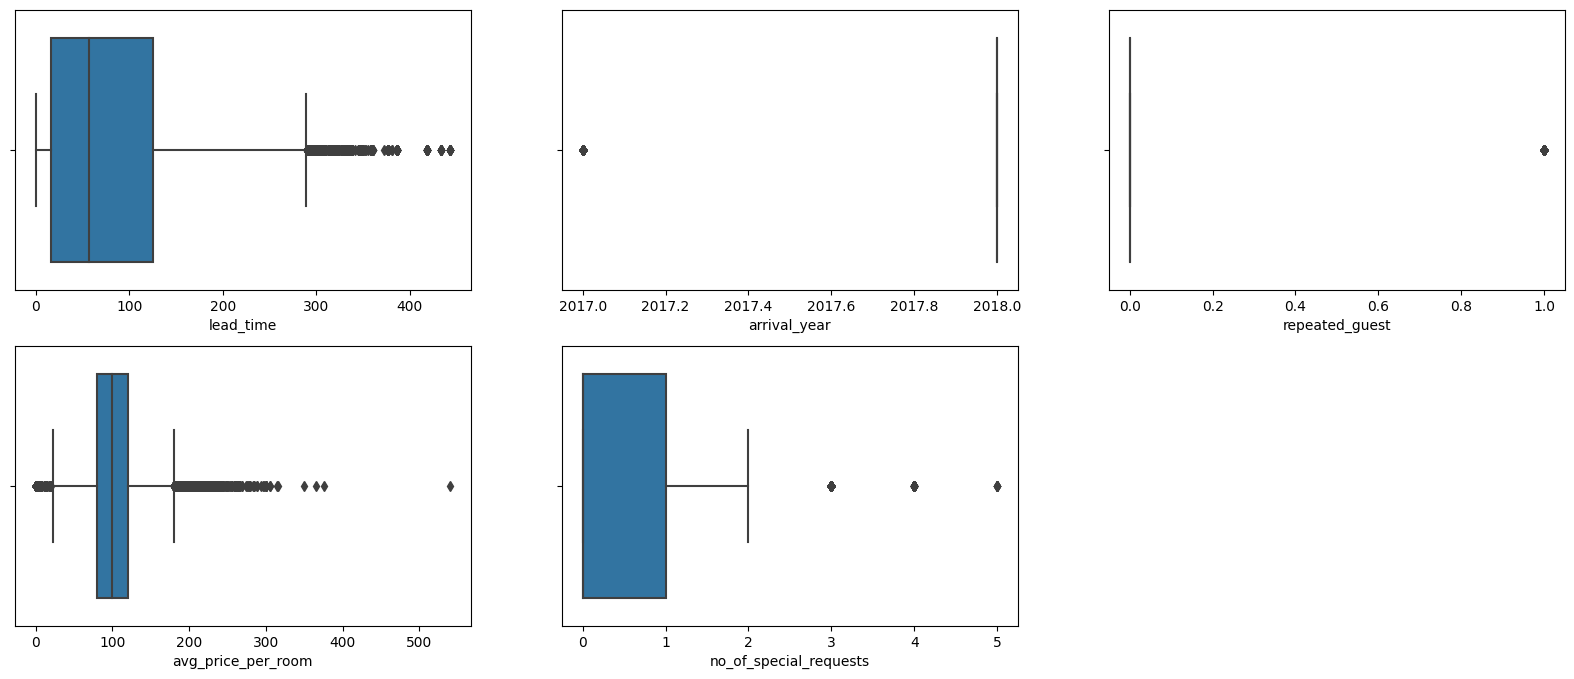

In [28]:
# mengecek outlier X_train dengan boxplot

plt.figure(figsize=(20, 8))

plt.subplot(2,3,1)
sns.boxplot(x=X_train['lead_time'])

plt.subplot(2,3,2)
sns.boxplot(x=X_train['arrival_year'])

plt.subplot(2,3,3)
sns.boxplot(x=X_train['repeated_guest'])

plt.subplot(2,3,4)
sns.boxplot(x=X_train['avg_price_per_room'])

plt.subplot(2,3,5)
sns.boxplot(x=X_train['no_of_special_requests'])


- Terdapat beberapa outlier pada kolom fitur, namun disini saya menganggap outlier masih dalam batas wajar, jadi disini saya tidak menanganinya

## Scaling Fitur

Untuk scaling fitur dalam kasus ini saya akan menggunakan scaling model RobustScaler. Karena target klasifikasinya memiliki proporsi yang imbalance, dan ada beberapa outlier pada data, jadi saya menggunnakan RobustScaler yang cukup friendly dengan outlier.

In [29]:
# menscaling fitur

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

## Encoding Fitur

Karena ada kolom kategorik pada fitur maka disini saya akan mengencode kolom kategorik tersebut, dimana hanya ada 1 kolom kategorik dan tidak memiliki tingkatan, jadi disini saya menggunakan OneHotEncoder

In [30]:
# ecoding fitur dengan OneHot cncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_encoded = encoder.transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

In [31]:
# menggabungkan fitur yang sudah di scaling dan di encode

X_train_final = np.concatenate((X_train_scaled, X_train_encoded.toarray()), axis=1)
X_test_final = np.concatenate((X_test_scaled, X_test_encoded.toarray()), axis=1)

# 6. Mendefinisikan Model

Untuk mengklasifikasi dalam kasus ini saya akan mencoba menggunakan 5 model algoritma yang berbeda dan mencoba menemukan salah satu yang terbaik untuk menyelesaikan permasalahan kali ini

In [32]:
# memanggil model yang akan digunakan

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

model_lr = LogisticRegression()
model_svm = SVC()
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_gbc = GradientBoostingClassifier()

# fit model
model_lr.fit(X_train_final,y_train)
model_svm.fit(X_train_final,y_train)
model_dtc.fit(X_train_final,y_train)
model_rfc.fit(X_train_final,y_train)
model_gbc.fit(X_train_final, y_train)

GradientBoostingClassifier()

# 7. Melatih Model

In [33]:
# cek performa model pada train-set

y_pred_train_model_lr = model_lr.predict(X_train_final)
y_pred_train_model_svm = model_svm.predict(X_train_final)
y_pred_train_model_dtc = model_dtc.predict(X_train_final)
y_pred_train_model_rfc = model_rfc.predict(X_train_final)
y_pred_train_model_gbc = model_gbc.predict(X_train_final)

print('F1 Score - Train Set - Model LR : ', f1_score(y_train, y_pred_train_model_lr))
print('F1 Score - Train Set - Model SVM : ', f1_score(y_train, y_pred_train_model_svm))
print('F1 Score - Train Set - Model DTC : ', f1_score(y_train, y_pred_train_model_dtc))
print('F1 Score - Train Set - Model RFC : ', f1_score(y_train, y_pred_train_model_rfc))
print('F1 Score - Train Set - Model GBC : ', f1_score(y_train, y_pred_train_model_gbc))

F1 Score - Train Set - Model LR :  0.6693967008882225
F1 Score - Train Set - Model SVM :  0.7248277021348126
F1 Score - Train Set - Model DTC :  0.9666218758398281
F1 Score - Train Set - Model RFC :  0.9668930390492361
F1 Score - Train Set - Model GBC :  0.7477944106095964


- Dari hasil diatas untuk train-set model DTC dan RFC memmiliki F1 score yanng tinggi, selanjutnya kita coba cross validation dengan cv 5 dan lihat lagi performa modelnya

In [34]:
# Cross Validation menggunakan `cross_val_score`

f1_score_train_cross_val_lr = cross_val_score(model_lr, X_train_final, y_train, cv=5,  scoring='f1')
f1_score_train_cross_val_svm = cross_val_score(model_svm, X_train_final, y_train, cv=5,  scoring='f1')
f1_score_train_cross_val_dtc= cross_val_score(model_dtc, X_train_final, y_train, cv=5,  scoring='f1')
f1_score_train_cross_val_rfc = cross_val_score(model_rfc, X_train_final, y_train, cv=5,  scoring='f1')
f1_score_train_cross_val_gbc = cross_val_score(model_gbc, X_train_final, y_train, cv=5,  scoring='f1')


print('F1 Score Mean - Cross Validation - Model LR : ', f1_score_train_cross_val_lr.mean())
print('F1 Score Mean - Cross Validation - Model SVM : ', f1_score_train_cross_val_svm.mean())
print('F1 Score Mean - Cross Validation - Model DTC : ', f1_score_train_cross_val_dtc.mean())
print('F1 Score Mean - Cross Validation - Model RFC : ', f1_score_train_cross_val_rfc.mean())
print('F1 Score Mean - Cross Validation - Model GBC : ', f1_score_train_cross_val_gbc.mean())

F1 Score Mean - Cross Validation - Model LR :  0.6694018867540892
F1 Score Mean - Cross Validation - Model SVM :  0.7212685992690975
F1 Score Mean - Cross Validation - Model DTC :  0.7642399532695963
F1 Score Mean - Cross Validation - Model RFC :  0.7882285388144723
F1 Score Mean - Cross Validation - Model GBC :  0.7461443496318625


- Setelah di CV masih model RFC yang mempunyai F1 score paling baik dari semua model yang di pakai, walaupun mengalami cukup banyak penurunan dariapada sebelum di cross validation

# 8. Mengevaluasi Model

In [35]:
# cek performa model pada test-set

y_pred_lr= model_lr.predict(X_test_final)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

y_pred_svm = model_svm.predict(X_test_final)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

y_pred_dtc= model_dtc.predict(X_test_final)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

y_pred_rfc = model_rfc.predict(X_test_final)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

y_pred_gbc = model_gbc.predict(X_test_final)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

In [36]:
# membuat tabel hasil uji model terhadap test-set

models = pd.DataFrame({ 'Model': ['model_lr','model_svm','model_dtc','model_rfc','model_gbc'],
                        'F1_Score': [f1_lr,f1_svm,f1_dtc,f1_rfc,f1_gbc],
                        'Accuracy':[accuracy_lr,accuracy_svm,accuracy_dtc,accuracy_rfc,accuracy_gbc]})
models.sort_values(by='Accuracy', ascending=False)

,Model,F1_Score,Accuracy
3,model_rfc,0.801883,0.872364
2,model_dtc,0.782535,0.858580
4,model_gbc,0.737917,0.840799
1,model_svm,0.719929,0.827016
0,model_lr,0.679783,0.804824


- Dari hasil diatas maka saya memutuskan untuk menggunakan model RFC(RandomForestClassifier) karena memiliki f1 score serta akurasi paling tinggi pada data test-set untuk di gunakan sebagai model pada permasalahan kali ini

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      4869
           1       0.82      0.79      0.80      2386

    accuracy                           0.87      7255
   macro avg       0.86      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255
 

Confusion Matrix      : 


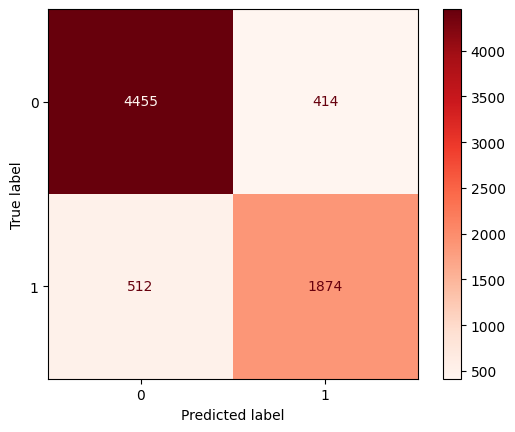

In [37]:
# cek performa model rfc test-set dengan classification_report dan ConfusionMatrix

print('Classification Report : \n', classification_report(y_test, y_pred_rfc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rfc, X_test_final, y_test, cmap='Reds'))

- Dalam test set performa model cukup baik, dimana yang pada dataset mengcancel reservasi, dan di prediksi cancel cukup tepat. Dalam hal bisnis hotel dengan model reservasi seperti ini, yang perlu ditingkatkan adalah yang pada data cancel dan di prediksi cancel harus lebih diutamakan, karena kalau data aslinya cancel tapi di prediksi tidak cancel ini bisa merugikan pihak hotel, dimana mereka tidak jadi mendapatkan keuntungan. Sementara untuk yang pada data asli tidak cancel dan di prediksi cancel, ini tidak terlalu begitu masalah, karena memang pihak hotel harus siap dengan semua reservasi tersebut, tidak boleh kalau diprediksi gagal trus pihak hotel memberikan pelayanan seadanyaa. Selain itu jika tidak cancel namun di prediksi cancel ini sama saja di ibaratkan udah pesimis gag dapat cuan e ternyata malah dapet cuan.

Dalam kasus kali ini saya akan coba membuat parameter baru untuk meningkatkan performa model terutama untuk meningkatkan hasil prediksi cancel yang benar benar cancel, disini saya coba untuk mencari parameternya dengan menggunakan gridsearch

In [38]:
# mencari parameter terbaik dengan gridsearch

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [5, 10],
    'class_weight': [{0: 1, 1: 3}],
    'criterion': ['entropy', 'gini']
}
# Inisiasi GridSearchCV dengan parameter yang telah ditentukan
grid_search = GridSearchCV(model_rfc, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Latih model pada data pelatihan dengan GridSearchCV
grid_search.fit(X_train_final, y_train)

print("Parameter terbaik: ", grid_search.best_params_)

Parameter terbaik:  {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


- Setelah mendapatkan parameternya, mari kita gunakan parameter tersebut ke dalam model 

In [46]:
# memasukan parameter ke dalam model

rfc = RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion = 'gini', max_depth=20, min_samples_split= 10, n_estimators= 100)

# fit dan predict test-set dengan model yang sudah diubah parameternya

rfc.fit(X_train_final, y_train)
y_pred = rfc.predict(X_test_final)

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      4869
           1       0.77      0.85      0.81      2386

    accuracy                           0.87      7255
   macro avg       0.84      0.86      0.85      7255
weighted avg       0.87      0.87      0.87      7255
 

Confusion Matrix Sesudah Tuning   : 
Confusion Matrix Sebelum Tuning: 


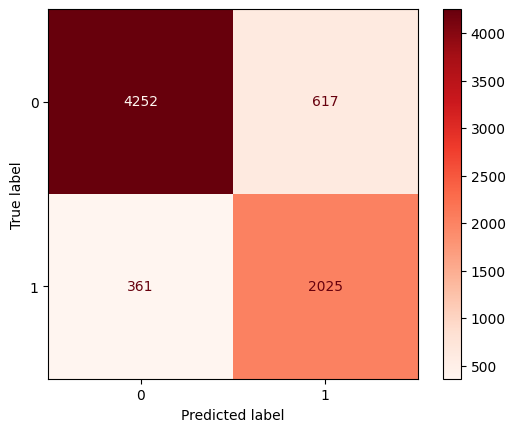

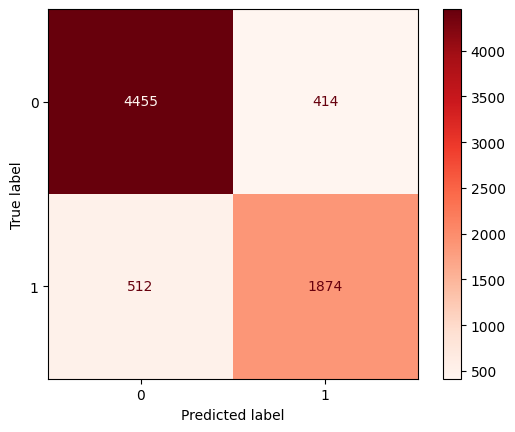

In [47]:
# cek performa model rfc test-set dengan ConfusionMatrixDisplay

print('Classification Report : \n', classification_report(y_test, y_pred), '\n')
print('Confusion Matrix Sesudah Tuning   : \n', ConfusionMatrixDisplay.from_estimator(rfc, X_test_final, y_test, cmap='Reds'))
print('Confusion Matrix Sebelum Tuning: \n', ConfusionMatrixDisplay.from_estimator(model_rfc, X_test_final, y_test, cmap='Reds'))

- Dari confuion matrik diatas terlihat bahwa ada peningkatan pada prediksi cancel dan benar cancel, ini brarti langkah kita sudah tepat dalam melakukan hyperparameter tuningnya, sudah sesuai dengan keinginan.

# 9. Menyimpan Model

In [45]:
# menyimpan model

import pickle
import json

with open('model_rfc.pkl', 'wb') as file_1:
  pickle.dump(rfc, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt','w') as file_5: 
  json.dump(cat_columns, file_5)

# 10. Kesimpulan

Dari hasil EDA didapati bahwa pelanggan yang mungkin akan membatalkan reservasi adalah pelanngan yang memesan pada tahun 2018 untuk 2 orang dewasa tanpa membawa anak, dan memiliki waktu pemesanan dengan kedatangan memiliki selisih waktu diatas 3 bulan bertipe segment online dan dengan room type 1 dengan rentang harga per room 50 - 150. Dari berbagi model yang saya coba dalam kasus ini saya mendapati model randomforest mempunyai performa paling baik untuk memprediksi booking status cancel atau tidak. Dalam kasus ini model dapat membantu pihak hotel dalam hal untuk memperkirakan pendapatan dari sebuah reservasi atau booking yang terjadi, dimana jika prediksi cancel maka bisa di asumsikan tidak mendapatkan keuntungan dari reservasi tersebut. Namun dalam kasus ini akurasi model masih kurang, dimana akurasinya hanya 86%, ini bisa dijadikan pertimbangan untuk digunakan atau tidaknya model ini. Saran saya masih bisa digunakan dengan sedikit mengatur parameternya serta membuat oversampling pada data untuk menangani data yang imbalance agar akurasinya meningkat paling tidak samapai akurasinya menjadi 95%.

# 11. Deployment

Link : https://huggingface.co/spaces/pram2601/hotel_booking_prediction